<a href="https://colab.research.google.com/github/forlinarthur/deep-learning-tensorflow/blob/master/TF2_0_Spam_Detection_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.0.0-beta1


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [0]:
# Unfortunately this URL doesn't work directly with pd.read_csv
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2020-05-12 18:39:11--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 2606:4700:3037::681f:5030, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K   839KB/s    in 0.6s    

2020-05-12 18:39:12 (839 KB/s) - ‘spam.csv’ saved [503663/503663]



In [0]:
!head spam.csv

UnicodeDecodeError: ignored

In [0]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [0]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [0]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [0]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# rename columns to something better
df.columns = ['labels', 'data']

In [0]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [0]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [0]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [0]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [0]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7284 unique tokens.


In [0]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [0]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [0]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)


In [0]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 2s 18ms/step - loss: 0.4730 - accuracy: 0.8428 - val_loss: 0.3901 - val_accuracy: 0.8673
Epoch 2/10
117/117 [==============================] - 2s 15ms/step - loss: 0.3762 - accuracy: 0.8653 - val_loss: 0.3408 - val_accuracy: 0.8673
Epoch 3/10
117/117 [==============================] - 2s 15ms/step - loss: 0.3250 - accuracy: 0.8653 - val_loss: 0.3053 - val_accuracy: 0.8673
Epoch 4/10
117/117 [==============================] - 2s 17ms/step - loss: 0.2793 - accuracy: 0.8653 - val_loss: 0.2337 - val_accuracy: 0.8673
Epoch 5/10
117/117 [==============================] - 2s 16ms/step - loss: 0.1611 - accuracy: 0.9488 - val_loss: 0.1314 - val_accuracy: 0.9788
Epoch 6/10
117/117 [==============================] - 2s 15ms/step - loss: 0.0862 - accuracy: 0.9906 - val_loss: 0.0919 - val_accuracy: 0.9837
Epoch 7/10
117/117 [==============================] - 2s 16ms/step - loss: 0.0533 - accuracy: 0.9936 - val_loss: 0.0734 - va

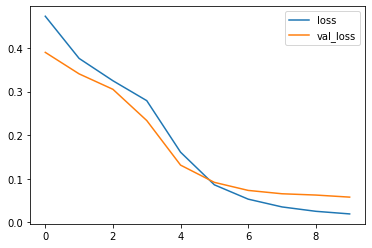

In [0]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

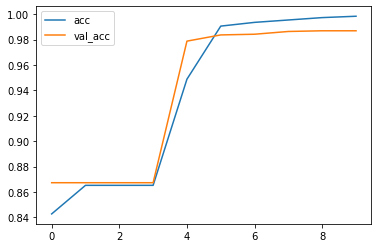

In [0]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
predictions = model.predict(data_test)

In [0]:
predictions[:15]

array([[0.05464098],
       [0.03365017],
       [0.5747612 ],
       [0.00672222],
       [0.0176893 ],
       [0.12432908],
       [0.01067768],
       [0.00554816],
       [0.01280887],
       [0.00423988],
       [0.01012891],
       [0.00671334],
       [0.00511346],
       [0.00427769],
       [0.95572394]], dtype=float32)

In [0]:
df_test.keys

<bound method Series.keys of 5409              There is a first time for everything :)
275                                              Thanx...
573                                Waiting for your call.
5343    No go. No openings for that room 'til after th...
4080                            Hurry home. Soup is DONE!
                              ...                        
3763    Would me smoking you out help us work through ...
322     cud u tell ppl im gona b a bit l8 cos 2 buses ...
2314    Also that chat was awesome but don't make it r...
1929    Free 1st week entry 2 TEXTPOD 4 a chance 2 win...
2518    Joy's father is John. Then John is the NAME of...
Name: data, Length: 1839, dtype: object>

In [0]:
##Make predictions a binary array
y_pred = [pred > 0.5 for pred in predictions]

In [0]:
y_pred[:15]

In [0]:
confusion_matrix(Ytest, y_pred)

array([[1590,    5],
       [  19,  225]])

In [0]:
df_preds.head(50)

,email,SPAM?
5409,There is a first time for everything :),[False]
275,Thanx...,[False]
573,Waiting for your call.,[True]
5343,No go. No openings for that room 'til after th...,[False]
4080,Hurry home. Soup is DONE!,[False]
3346,No problem baby. Is this is a good time to tal...,[False]
4818,Got smaller capacity one? Quite ex...,[False]
3866,"Alright we're hooked up, where you guys at",[False]
5534,Ok which your another number,[False]
1382,Its ok my arm is feeling weak cuz i got a shot...,[False]


In [0]:
df_preds = pd.DataFrame({"email": df_test, "SPAM?": y_pred})